In [ ]:
# Завантаження потрібних бібліотек
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Імпорт відповідних бібліотек
import os
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image as IPyImage

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# === 1. Налаштування ===
# Параметри
HOME = os.getcwd() # Домашня директорія
API_KEY = "US6GFXKmmIauPoD8GLi5" # API-ключ
WORKSPACE_NAME = "dekkan-neural-network-workspace" # Назва робочої області (Dekkan neural network workspace)
PROJECT_NAME = "cats_detection-yjccj" # Ім'я проєкту (Cats_detection)
DATASET_VERSION = 1 # Версія датасету
DATA_FORMAT = "yolov11" # Формат даних датасету
MODEL_PATH = f"{HOME}/models/yolo11m.pt" # Шлях до завантаженої моделі
TRAIN_EPOCHS = 100 # Кількість епох
IMG_SIZE = 640 # Розмір зображень

In [ ]:
# === 2. Завантаження датасету ===
def download_dataset():
    print("Завантаження датасету...")
    rf = Roboflow(api_key=API_KEY)
    project = rf.workspace(WORKSPACE_NAME).project(PROJECT_NAME)
    version = project.version(DATASET_VERSION)
    dataset = version.download(DATA_FORMAT)
    print(f"Датасет завантажено до: {dataset.location}")
    return dataset

In [ ]:
# === 3. Тренування моделі ===
def train_model(dataset):
    print("Тренування моделі...")
    model = YOLO(MODEL_PATH)  # Завантаження предтренованої моделі

    print("Пристрій, що використовується:", model.device)
    model.train(
        data = f"{dataset.location}/data.yaml",
        epochs = TRAIN_EPOCHS,
        imgsz = IMG_SIZE,
        plots = True,
        save = True,
        project = 'runs/detect',  # Стандартний шлях
        name = 'train_result',  # Ім'я підкаталогу
        batch = 16,
    )
    print("Тренування завершено.")
    return model

In [ ]:
# === 4. Основний блок ===
if __name__ == "__main__":
    # Завантаження датасету
    dataset = download_dataset()

    # Тренування моделі
    model = train_model(dataset)

    # Отримання шляху до останньої тренувальної сесії
    runs_path = "runs/detect"
    latest_run = max([os.path.join(runs_path, d) for d in os.listdir(runs_path)], key=os.path.getmtime)
    print(f"Останній запуск збережено в: {latest_run}")

    print("Все завершено успішно.")

Завантаження датасету...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cats_detection-1 in yolov11:: 100%|██████████| 33458/33458 [00:04<00:00, 6835.18it/s]


Датасет завантажено до: /content/Cats_detection-1
Тренування моделі...


100%|██████████| 38.8M/38.8M [00:00<00:00, 371MB/s]


Пристрій, що використовується: cpu
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/models/yolo11m.pt, data=/content/Cats_detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=train_result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

100%|██████████| 755k/755k [00:00<00:00, 159MB/s]


Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 392MB/s]


AMP: checks passed ✅


train: Scanning /content/Cats_detection-1/train/labels... 14634 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14634/14634 [00:10<00:00, 1388.83it/s]


train: New cache created: /content/Cats_detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Cats_detection-1/valid/labels... 1393 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1393/1393 [00:01<00:00, 1092.62it/s]

val: New cache created: /content/Cats_detection-1/valid/labels.cache


Plotting labels to runs/detect/train_result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train_result
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.72G     0.6728      2.482      1.359         31        640: 100%|██████████| 915/915 [02:30<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.00it/s]


                   all       1393       1440      0.453      0.577       0.52      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.65G     0.6882      1.878      1.349         29        640: 100%|██████████| 915/915 [02:22<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.90it/s]

                   all       1393       1440      0.427      0.534      0.477      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.64G     0.7885      1.976      1.415         33        640: 100%|██████████| 915/915 [02:18<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.93it/s]


                   all       1393       1440      0.239      0.415      0.285      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.62G     0.8163      2.024      1.436         32        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.01it/s]

                   all       1393       1440      0.409      0.563       0.47      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.65G      0.758      1.886      1.388         30        640: 100%|██████████| 915/915 [02:17<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.97it/s]

                   all       1393       1440      0.438      0.523      0.457      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.68G     0.7179      1.798      1.353         30        640: 100%|██████████| 915/915 [02:16<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.04it/s]

                   all       1393       1440      0.544      0.625      0.621      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.66G     0.6841      1.711      1.327         29        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.01it/s]

                   all       1393       1440      0.553      0.635      0.643      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.62G     0.6608      1.652      1.309         32        640: 100%|██████████| 915/915 [02:17<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.09it/s]

                   all       1393       1440      0.608      0.696      0.705      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.66G     0.6421      1.593      1.295         32        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.01it/s]

                   all       1393       1440       0.68      0.655      0.714      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.61G     0.6298      1.554      1.285         22        640: 100%|██████████| 915/915 [02:17<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.06it/s]

                   all       1393       1440      0.707        0.7      0.752      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.65G     0.6145      1.507      1.275         30        640: 100%|██████████| 915/915 [02:17<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.07it/s]

                   all       1393       1440      0.692      0.738      0.786      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.62G     0.6016      1.463      1.266         29        640: 100%|██████████| 915/915 [02:16<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.05it/s]

                   all       1393       1440       0.73      0.711      0.793      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.64G     0.5905      1.428      1.252         31        640: 100%|██████████| 915/915 [02:16<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.10it/s]

                   all       1393       1440      0.719      0.717       0.79      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.68G     0.5864       1.41      1.249         28        640: 100%|██████████| 915/915 [02:17<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.13it/s]

                   all       1393       1440      0.727      0.755      0.814      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.65G     0.5797      1.383      1.246         31        640: 100%|██████████| 915/915 [02:17<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.00it/s]

                   all       1393       1440      0.771      0.756       0.83      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.62G     0.5633      1.351      1.234         28        640: 100%|██████████| 915/915 [02:16<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.21it/s]

                   all       1393       1440      0.782      0.774      0.849      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.65G      0.564      1.337      1.236         27        640: 100%|██████████| 915/915 [02:14<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.26it/s]

                   all       1393       1440      0.782       0.81      0.862      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.62G      0.558      1.302      1.225         24        640: 100%|██████████| 915/915 [02:14<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.23it/s]

                   all       1393       1440      0.774       0.81      0.869      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.65G     0.5516      1.281      1.224         28        640: 100%|██████████| 915/915 [02:14<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.27it/s]

                   all       1393       1440      0.772      0.803      0.854      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.62G      0.541      1.259      1.213         28        640: 100%|██████████| 915/915 [02:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.20it/s]

                   all       1393       1440      0.787      0.821      0.872      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.65G      0.538      1.232      1.214         34        640: 100%|██████████| 915/915 [02:16<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.01it/s]

                   all       1393       1440      0.815      0.792      0.881       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.62G     0.5346      1.224       1.21         24        640: 100%|██████████| 915/915 [02:16<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.05it/s]

                   all       1393       1440       0.84      0.817      0.887      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.65G     0.5303      1.205      1.208         33        640: 100%|██████████| 915/915 [02:16<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.12it/s]

                   all       1393       1440      0.811      0.826      0.893       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.64G     0.5222      1.185      1.203         29        640: 100%|██████████| 915/915 [02:16<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.15it/s]

                   all       1393       1440      0.828      0.826      0.898      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.65G     0.5213      1.171      1.198         29        640: 100%|██████████| 915/915 [02:16<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.14it/s]

                   all       1393       1440      0.853      0.833      0.903      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       8.6G     0.5186      1.156      1.196         32        640: 100%|██████████| 915/915 [02:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.13it/s]

                   all       1393       1440      0.836      0.837      0.908      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.65G     0.5162      1.138      1.196         28        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.19it/s]

                   all       1393       1440      0.859      0.837       0.91      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.62G     0.5056      1.113      1.186         27        640: 100%|██████████| 915/915 [02:16<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.18it/s]

                   all       1393       1440       0.83      0.862       0.91      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.64G     0.5053      1.108      1.189         29        640: 100%|██████████| 915/915 [02:16<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.05it/s]

                   all       1393       1440      0.851      0.842       0.91      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.68G     0.4984      1.088      1.184         27        640: 100%|██████████| 915/915 [02:16<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.20it/s]

                   all       1393       1440      0.865      0.846       0.92      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.65G     0.4986      1.082      1.184         31        640: 100%|██████████| 915/915 [02:16<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.10it/s]

                   all       1393       1440      0.852      0.871      0.921      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.63G     0.4943       1.08       1.18         33        640: 100%|██████████| 915/915 [02:16<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.15it/s]

                   all       1393       1440      0.868       0.87       0.93      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.66G     0.4917      1.056      1.177         30        640: 100%|██████████| 915/915 [02:16<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.09it/s]

                   all       1393       1440      0.867      0.882      0.928      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.61G     0.4848       1.05      1.174         28        640: 100%|██████████| 915/915 [02:16<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.11it/s]

                   all       1393       1440      0.868      0.872      0.929      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.65G     0.4844      1.032       1.17         34        640: 100%|██████████| 915/915 [02:16<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.16it/s]

                   all       1393       1440      0.866      0.886      0.928      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.62G     0.4853      1.014      1.171         24        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.19it/s]

                   all       1393       1440      0.865      0.887       0.93      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.64G     0.4757      1.018      1.167         25        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.23it/s]

                   all       1393       1440      0.881      0.898      0.941      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.68G     0.4756      1.001      1.163         29        640: 100%|██████████| 915/915 [02:16<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.22it/s]

                   all       1393       1440      0.894      0.879      0.937      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.65G     0.4719     0.9842      1.163         32        640: 100%|██████████| 915/915 [02:17<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.21it/s]

                   all       1393       1440      0.883      0.881      0.937      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.63G     0.4722     0.9849      1.162         29        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.04it/s]

                   all       1393       1440      0.869      0.887      0.935      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.65G     0.4706     0.9763      1.159         32        640: 100%|██████████| 915/915 [02:18<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.99it/s]

                   all       1393       1440      0.866      0.902      0.938      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       8.6G     0.4687     0.9587      1.157         26        640: 100%|██████████| 915/915 [02:18<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.18it/s]

                   all       1393       1440      0.905      0.877      0.941      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.65G     0.4675     0.9494      1.158         35        640: 100%|██████████| 915/915 [02:17<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.14it/s]

                   all       1393       1440      0.883      0.885      0.944       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.64G     0.4559     0.9314       1.15         26        640: 100%|██████████| 915/915 [02:17<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.14it/s]

                   all       1393       1440      0.902      0.878      0.944      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.65G      0.458     0.9331      1.149         33        640: 100%|██████████| 915/915 [02:17<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.22it/s]

                   all       1393       1440      0.879      0.897      0.941      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.61G     0.4541     0.9101      1.146         36        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.23it/s]

                   all       1393       1440      0.906      0.879       0.94      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.65G      0.457       0.91      1.151         33        640: 100%|██████████| 915/915 [02:17<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.17it/s]

                   all       1393       1440      0.888      0.897       0.94      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.62G     0.4492     0.8968      1.146         26        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.32it/s]

                   all       1393       1440      0.912      0.876       0.94      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.65G     0.4493     0.8917      1.145         25        640: 100%|██████████| 915/915 [02:16<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.22it/s]

                   all       1393       1440      0.888      0.894      0.938      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.61G     0.4491     0.8767      1.143         30        640: 100%|██████████| 915/915 [02:16<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.22it/s]

                   all       1393       1440      0.892      0.896       0.94      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.65G     0.4406     0.8762      1.139         31        640: 100%|██████████| 915/915 [02:17<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.16it/s]

                   all       1393       1440      0.903      0.888       0.94      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.62G     0.4419     0.8602      1.138         33        640: 100%|██████████| 915/915 [02:17<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.05it/s]

                   all       1393       1440      0.897       0.89      0.941      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.65G     0.4378     0.8558      1.135         27        640: 100%|██████████| 915/915 [02:17<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.09it/s]

                   all       1393       1440      0.912      0.883      0.943      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.68G     0.4383     0.8496      1.135         28        640: 100%|██████████| 915/915 [02:16<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.09it/s]

                   all       1393       1440      0.911      0.887      0.944      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.65G     0.4308     0.8368      1.129         31        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.10it/s]

                   all       1393       1440      0.906      0.897      0.946      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.62G     0.4283     0.8341      1.131         31        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.22it/s]

                   all       1393       1440      0.901      0.894      0.944      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.65G     0.4279     0.8309       1.13         32        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.14it/s]

                   all       1393       1440      0.902      0.897      0.945      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       8.6G     0.4254     0.8206      1.127         27        640: 100%|██████████| 915/915 [02:17<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.15it/s]

                   all       1393       1440       0.89      0.908      0.946      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.66G     0.4263     0.8108      1.126         32        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.08it/s]

                   all       1393       1440      0.889      0.908      0.946       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.62G     0.4165     0.7919       1.12         26        640: 100%|██████████| 915/915 [02:16<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.10it/s]

                   all       1393       1440      0.895      0.898      0.945       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.65G     0.4212     0.7887      1.126         39        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.23it/s]

                   all       1393       1440      0.902      0.892      0.944      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.61G     0.4206     0.7879      1.123         25        640: 100%|██████████| 915/915 [02:17<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.24it/s]

                   all       1393       1440       0.91      0.894      0.945      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.65G     0.4159     0.7786      1.118         32        640: 100%|██████████| 915/915 [02:16<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.21it/s]

                   all       1393       1440      0.914      0.891      0.946       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.63G     0.4114     0.7755      1.118         24        640: 100%|██████████| 915/915 [02:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.11it/s]

                   all       1393       1440      0.908      0.897      0.946      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.65G     0.4087     0.7661      1.116         29        640: 100%|██████████| 915/915 [02:16<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.22it/s]

                   all       1393       1440      0.914      0.888      0.946       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.68G      0.409     0.7586      1.116         24        640: 100%|██████████| 915/915 [02:14<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.30it/s]

                   all       1393       1440      0.916      0.887      0.946      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.65G     0.4023       0.75      1.112         29        640: 100%|██████████| 915/915 [02:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.28it/s]

                   all       1393       1440      0.918      0.883      0.946       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.64G     0.4011     0.7347      1.108         23        640: 100%|██████████| 915/915 [02:14<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.39it/s]

                   all       1393       1440      0.926      0.879      0.945       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.65G     0.3994     0.7279      1.107         29        640: 100%|██████████| 915/915 [02:13<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.43it/s]

                   all       1393       1440      0.916      0.883      0.945      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.68G     0.4017     0.7267      1.108         25        640: 100%|██████████| 915/915 [02:11<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.45it/s]

                   all       1393       1440      0.917      0.885      0.945      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.65G     0.3919     0.7199      1.103         31        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.43it/s]

                   all       1393       1440      0.918      0.887      0.945      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.62G     0.3928     0.7128      1.103         26        640: 100%|██████████| 915/915 [02:11<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.44it/s]

                   all       1393       1440      0.913      0.887      0.945      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.65G     0.3897     0.6983      1.101         29        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.45it/s]

                   all       1393       1440       0.91      0.885      0.944      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       8.6G     0.3904     0.6924      1.102         31        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.46it/s]

                   all       1393       1440       0.92       0.88      0.944      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.65G     0.3817     0.6897      1.095         32        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.43it/s]

                   all       1393       1440      0.917      0.883      0.945      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.62G     0.3826     0.6761      1.098         23        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.42it/s]

                   all       1393       1440      0.914      0.886      0.944      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.64G     0.3776     0.6647      1.092         31        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.43it/s]

                   all       1393       1440      0.914      0.887      0.944      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.61G     0.3724     0.6595      1.087         28        640: 100%|██████████| 915/915 [02:11<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.45it/s]

                   all       1393       1440      0.914      0.889      0.944      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.65G      0.377     0.6636      1.092         28        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.44it/s]

                   all       1393       1440      0.916      0.888      0.945      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.64G     0.3712     0.6437      1.087         32        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.45it/s]

                   all       1393       1440      0.916      0.889      0.945      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.65G     0.3698     0.6392      1.088         38        640: 100%|██████████| 915/915 [02:11<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.44it/s]

                   all       1393       1440      0.915      0.888      0.945      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.68G      0.366     0.6345      1.085         35        640: 100%|██████████| 915/915 [02:12<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.41it/s]

                   all       1393       1440      0.913      0.888      0.945      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.65G      0.366       0.63      1.085         26        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.43it/s]

                   all       1393       1440      0.908      0.894      0.945      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.62G     0.3638     0.6268      1.081         34        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.42it/s]

                   all       1393       1440      0.909      0.892      0.946      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.65G     0.3571     0.6234      1.079         27        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.40it/s]

                   all       1393       1440      0.911      0.892      0.945      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.61G     0.3589     0.6046      1.078         35        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.39it/s]

                   all       1393       1440      0.912      0.891      0.945      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.65G     0.3581     0.6072      1.079         27        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.43it/s]

                   all       1393       1440      0.917      0.887      0.945      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.62G     0.3574     0.5965      1.076         24        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.43it/s]

                   all       1393       1440      0.918      0.886      0.945      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.64G      0.355     0.5885      1.077         27        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.44it/s]

                   all       1393       1440      0.918      0.888      0.945      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.68G      0.351     0.5793      1.073         31        640: 100%|██████████| 915/915 [02:11<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.41it/s]

                   all       1393       1440      0.916      0.891      0.946      0.886


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.63G      0.228     0.1967      1.031         10        640: 100%|██████████| 915/915 [02:12<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.36it/s]

                   all       1393       1440      0.915      0.892      0.946      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.61G      0.217     0.1778      1.022         11        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.37it/s]

                   all       1393       1440      0.916      0.893      0.946      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.64G     0.2091     0.1658       1.01         10        640: 100%|██████████| 915/915 [02:11<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.41it/s]

                   all       1393       1440      0.916      0.895      0.946      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.67G     0.2049      0.164      1.005         10        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.43it/s]

                   all       1393       1440      0.915      0.895      0.946      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.63G        0.2     0.1553      1.001         11        640: 100%|██████████| 915/915 [02:11<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.39it/s]

                   all       1393       1440      0.913      0.896      0.946      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.62G     0.1934     0.1478     0.9985         12        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.34it/s]

                   all       1393       1440      0.915      0.897      0.946      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.64G     0.1932     0.1458     0.9993         10        640: 100%|██████████| 915/915 [02:11<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.42it/s]

                   all       1393       1440      0.912      0.898      0.946      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.67G     0.1878     0.1394     0.9903         10        640: 100%|██████████| 915/915 [02:11<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.41it/s]

                   all       1393       1440      0.913      0.898      0.946      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.63G     0.1856     0.1357      0.987         10        640: 100%|██████████| 915/915 [02:11<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.40it/s]

                   all       1393       1440      0.914      0.897      0.946      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       8.6G     0.1811     0.1341     0.9851         10        640: 100%|██████████| 915/915 [02:12<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]

                   all       1393       1440      0.913      0.898      0.946      0.889



100 epochs completed in 3.989 hours.
Optimizer stripped from runs/detect/train_result/weights/last.pt, 40.6MB
Optimizer stripped from runs/detect/train_result/weights/best.pt, 40.6MB

Validating runs/detect/train_result/weights/best.pt...
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.69it/s]


                   all       1393       1440      0.914      0.898      0.946      0.889
            Abyssinian         55         55      0.909      0.982      0.989      0.946
      American Bobtail         64         65      0.856        0.8      0.867      0.829
         American Curl         44         47      0.952      0.851      0.969      0.927
                Bengal         69         70      0.777      0.871      0.886      0.803
                Birman         70         70      0.845      0.859      0.847      0.787
                Bombay         66         66      0.949       0.97      0.975      0.906
     British Shorthair         54         54      0.899      0.907      0.955      0.922
           Cornish Rex         60         61      0.935      0.967      0.986      0.919
          Egyptian Mau         51         51      0.818      0.804      0.904       0.85
            Khao Manee         42         49      0.935       0.98       0.99      0.915
                 Lyko

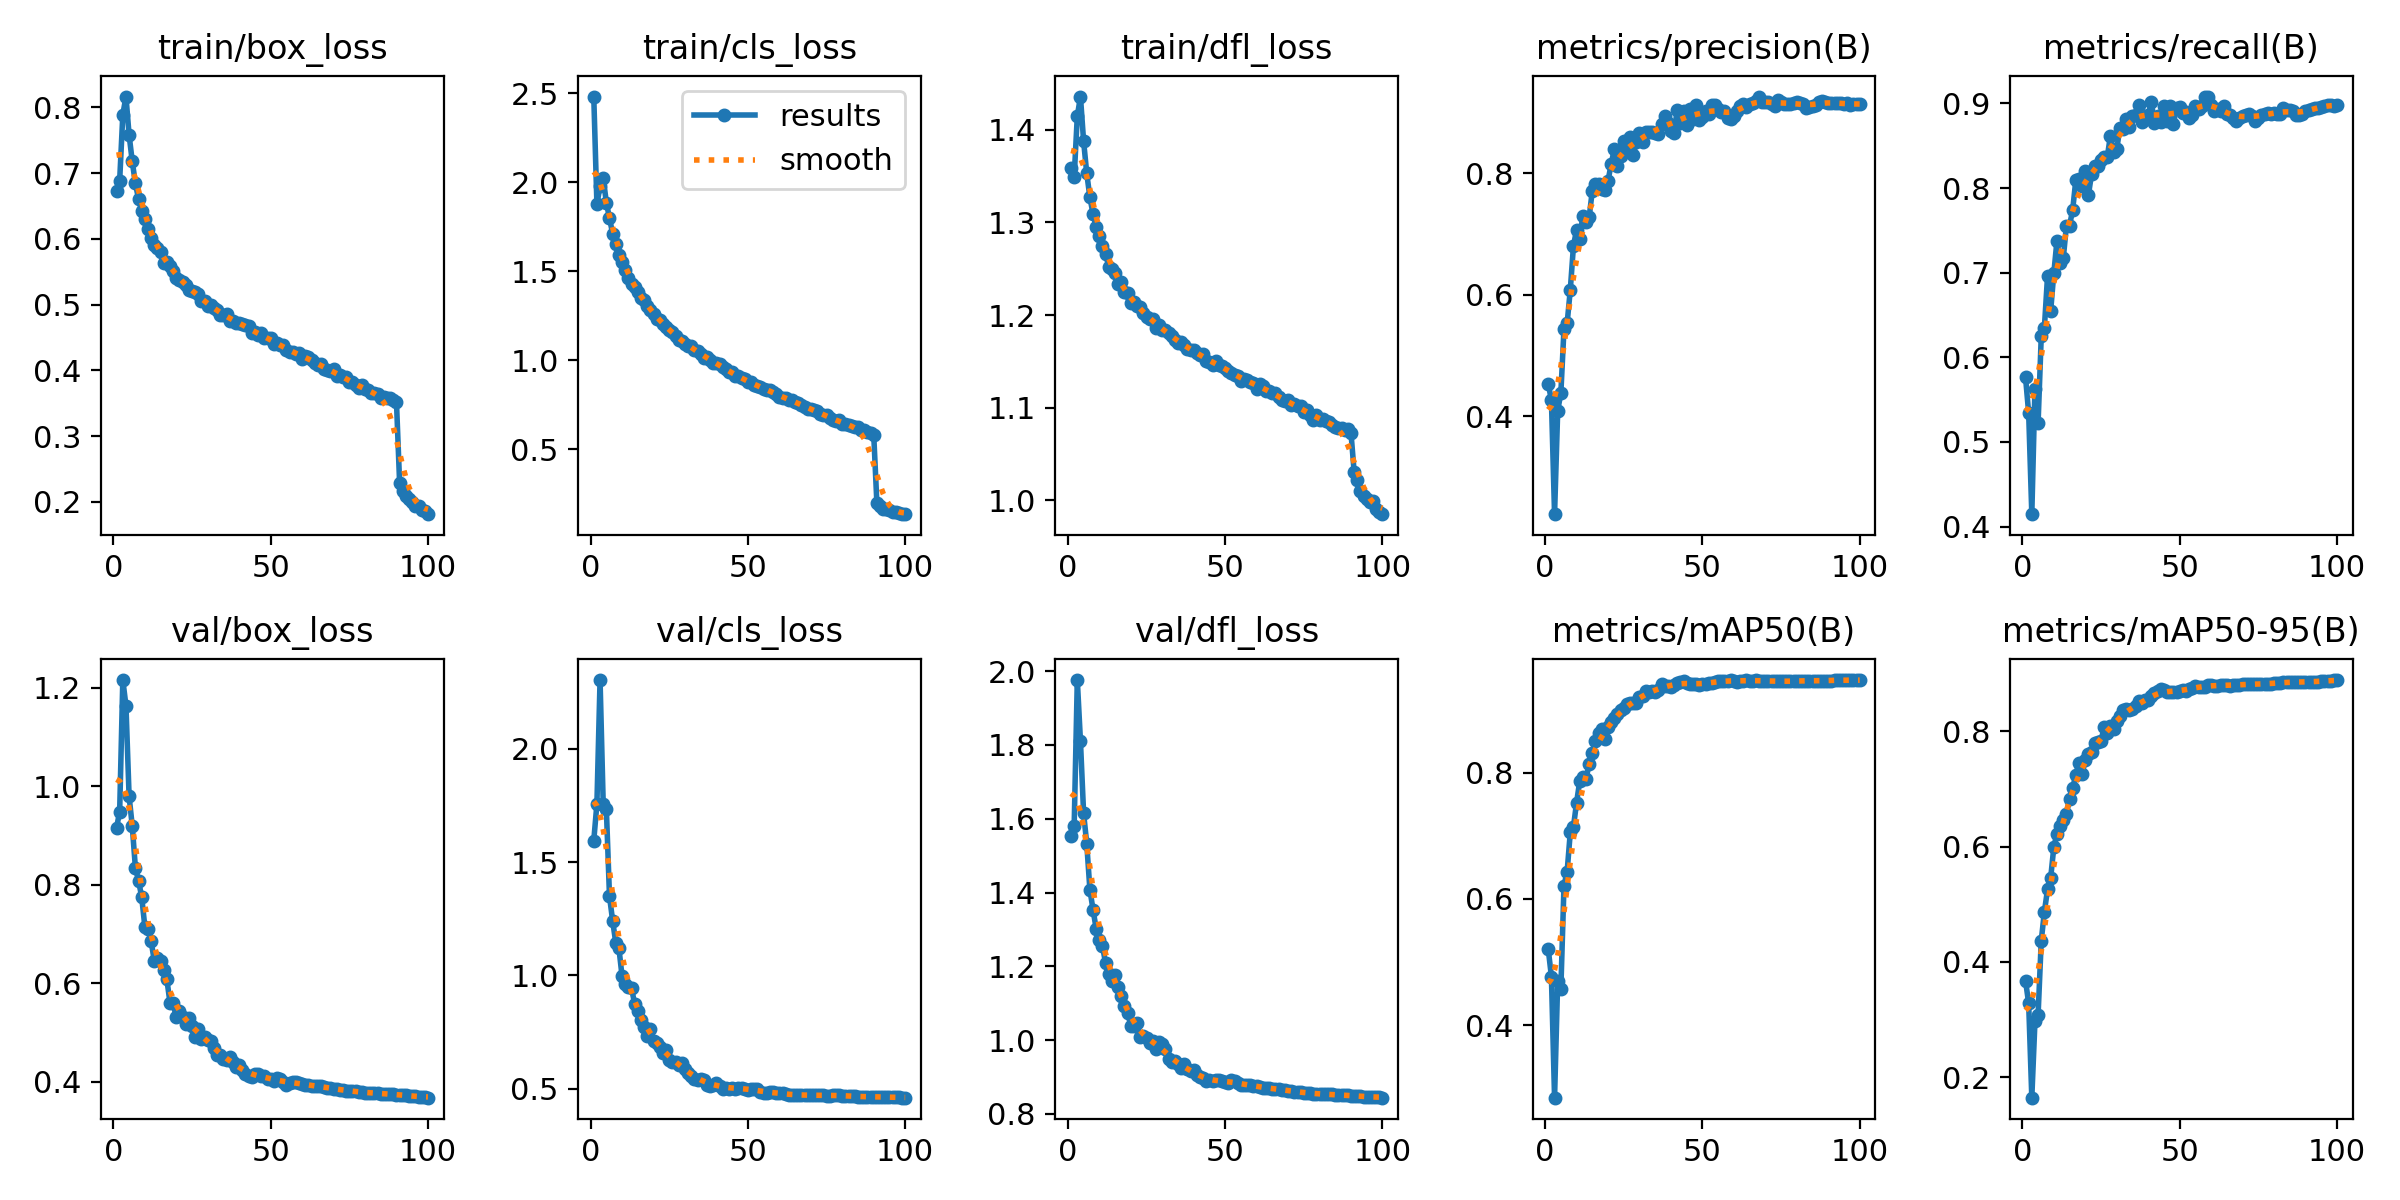

In [ ]:
# === 5. Отримання результатів навчання у вигляді графіків ===

# Загальні результати навчання
IPyImage (filename = f'/content/runs/detect/train_result/results.png', width =600)

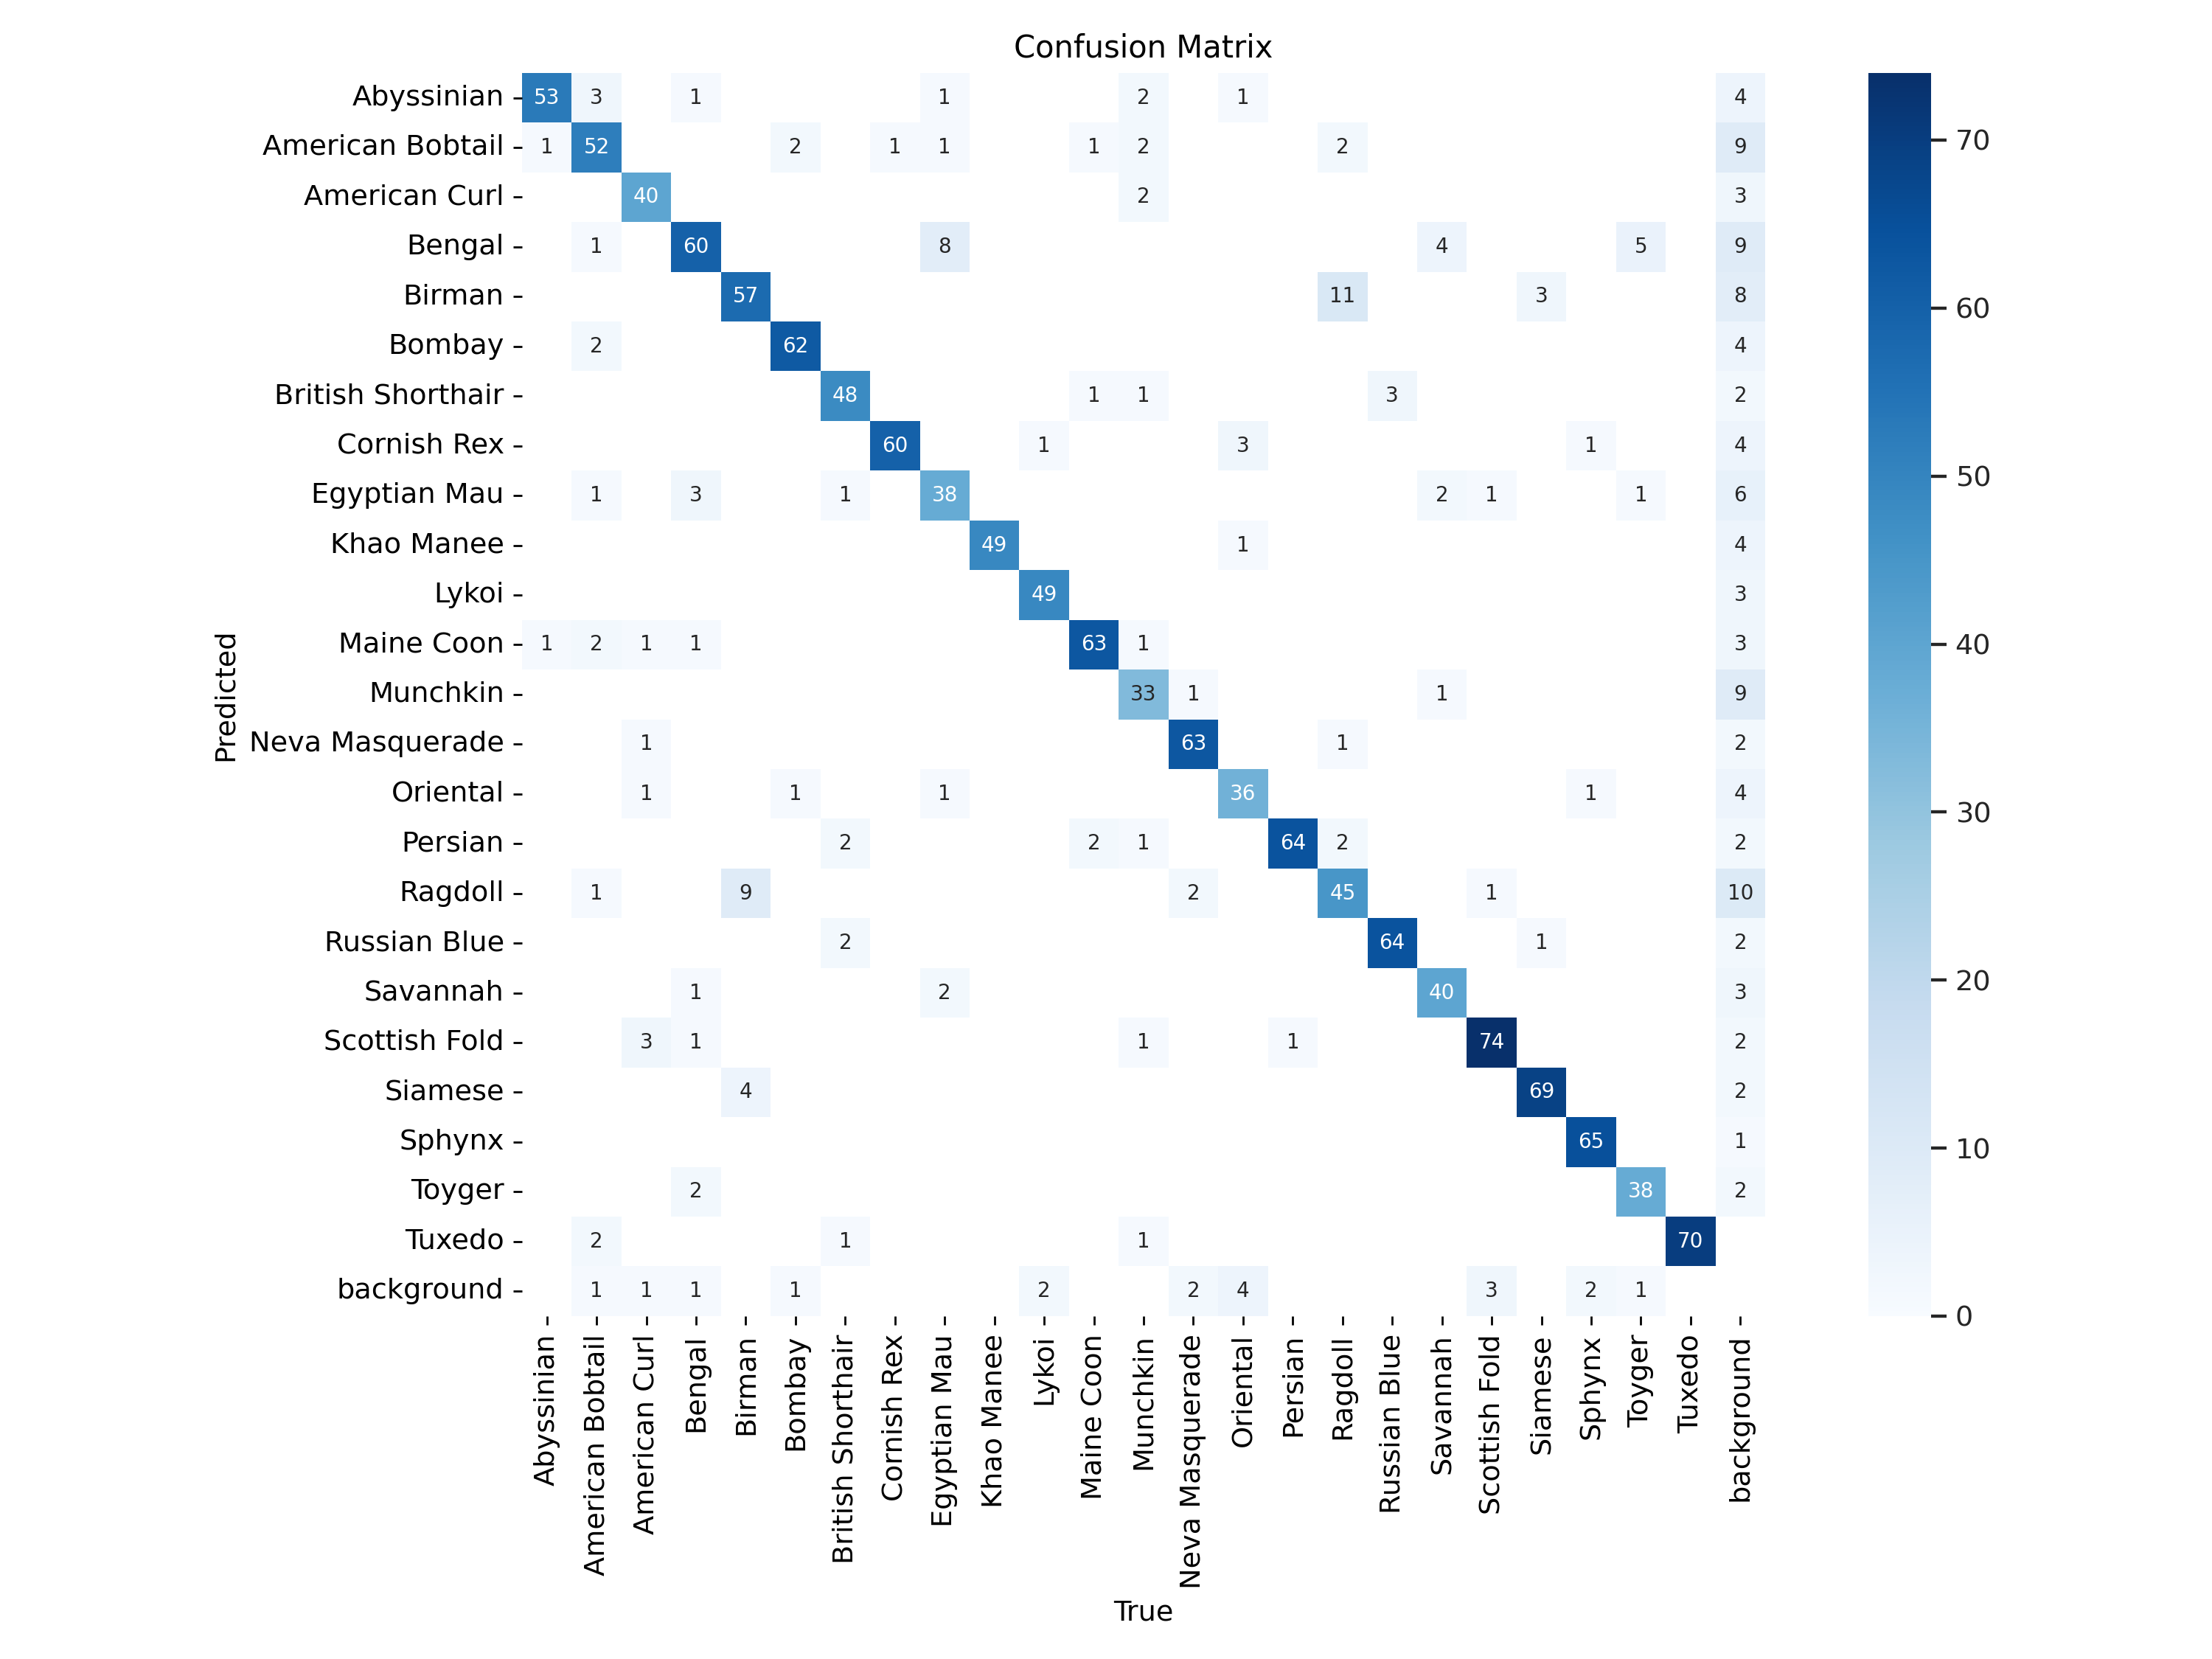

In [ ]:
# Матриця заплутаності (Confusion Matrix)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix.png', width =600)

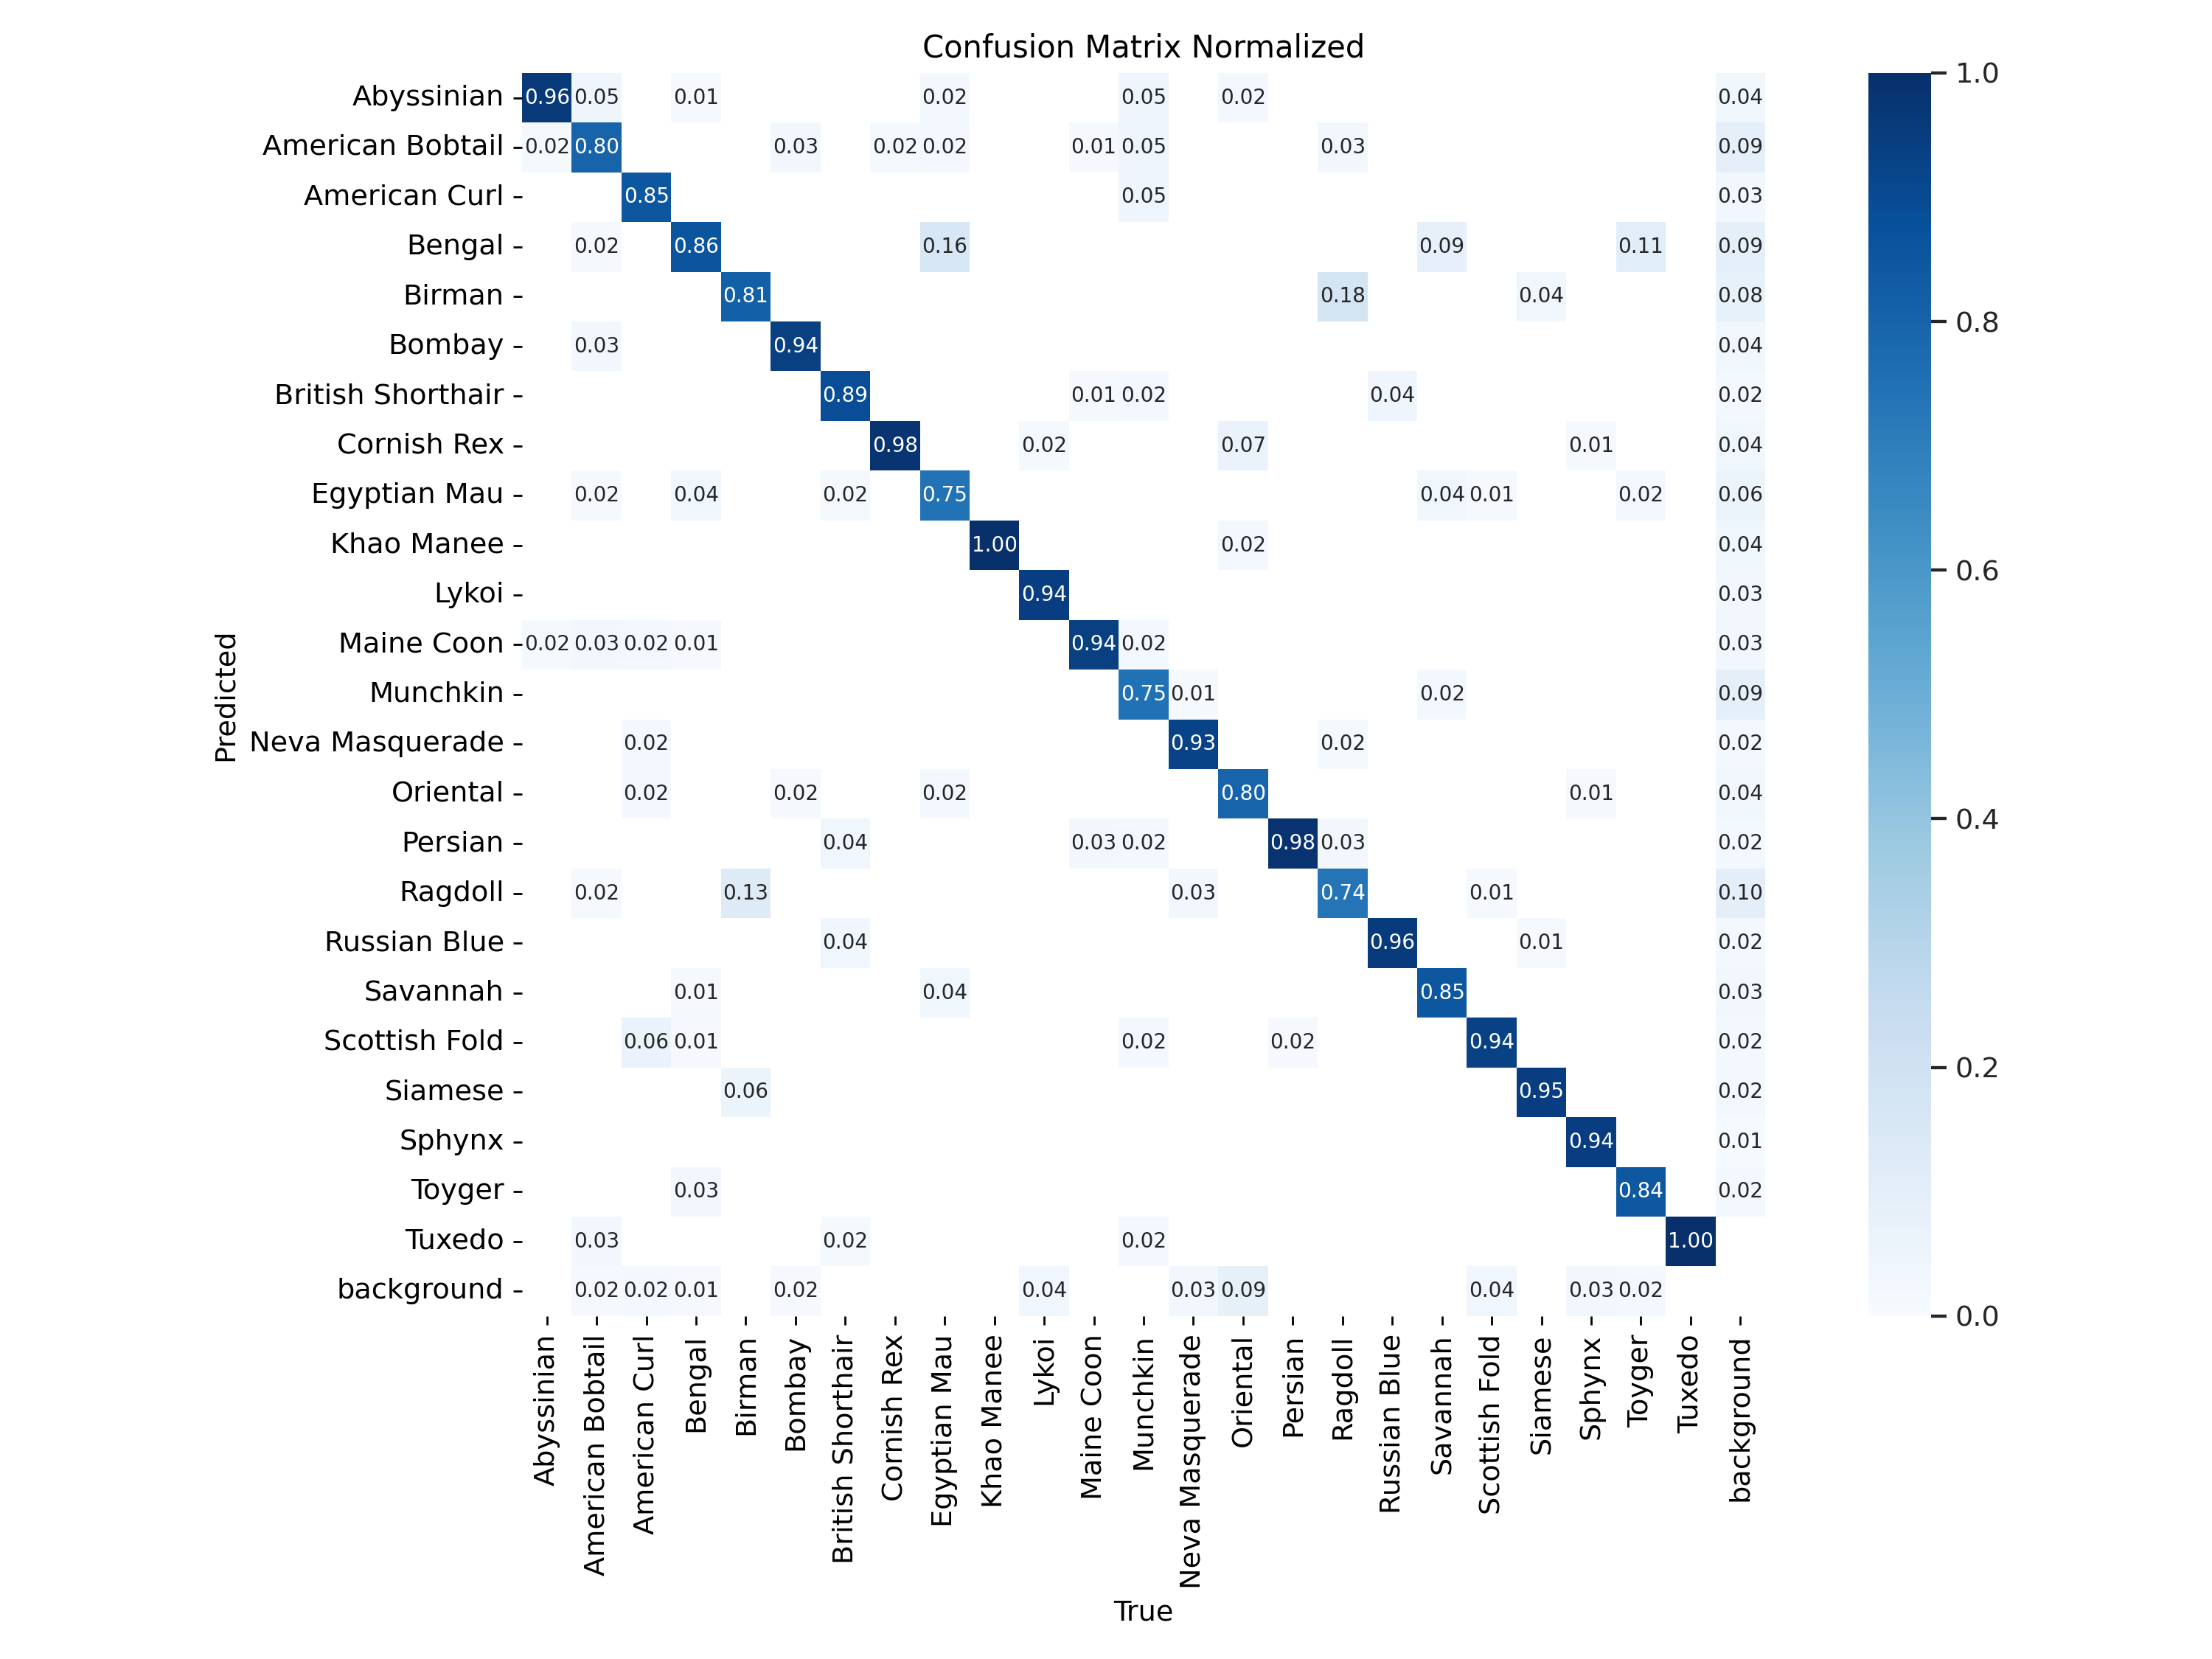

In [ ]:
# Нормалізована матриця заплутаності (Confusion Matrix Normalized)
IPyImage (filename = f'/content/runs/detect/train_result/confusion_matrix_normalized.png', width =600)

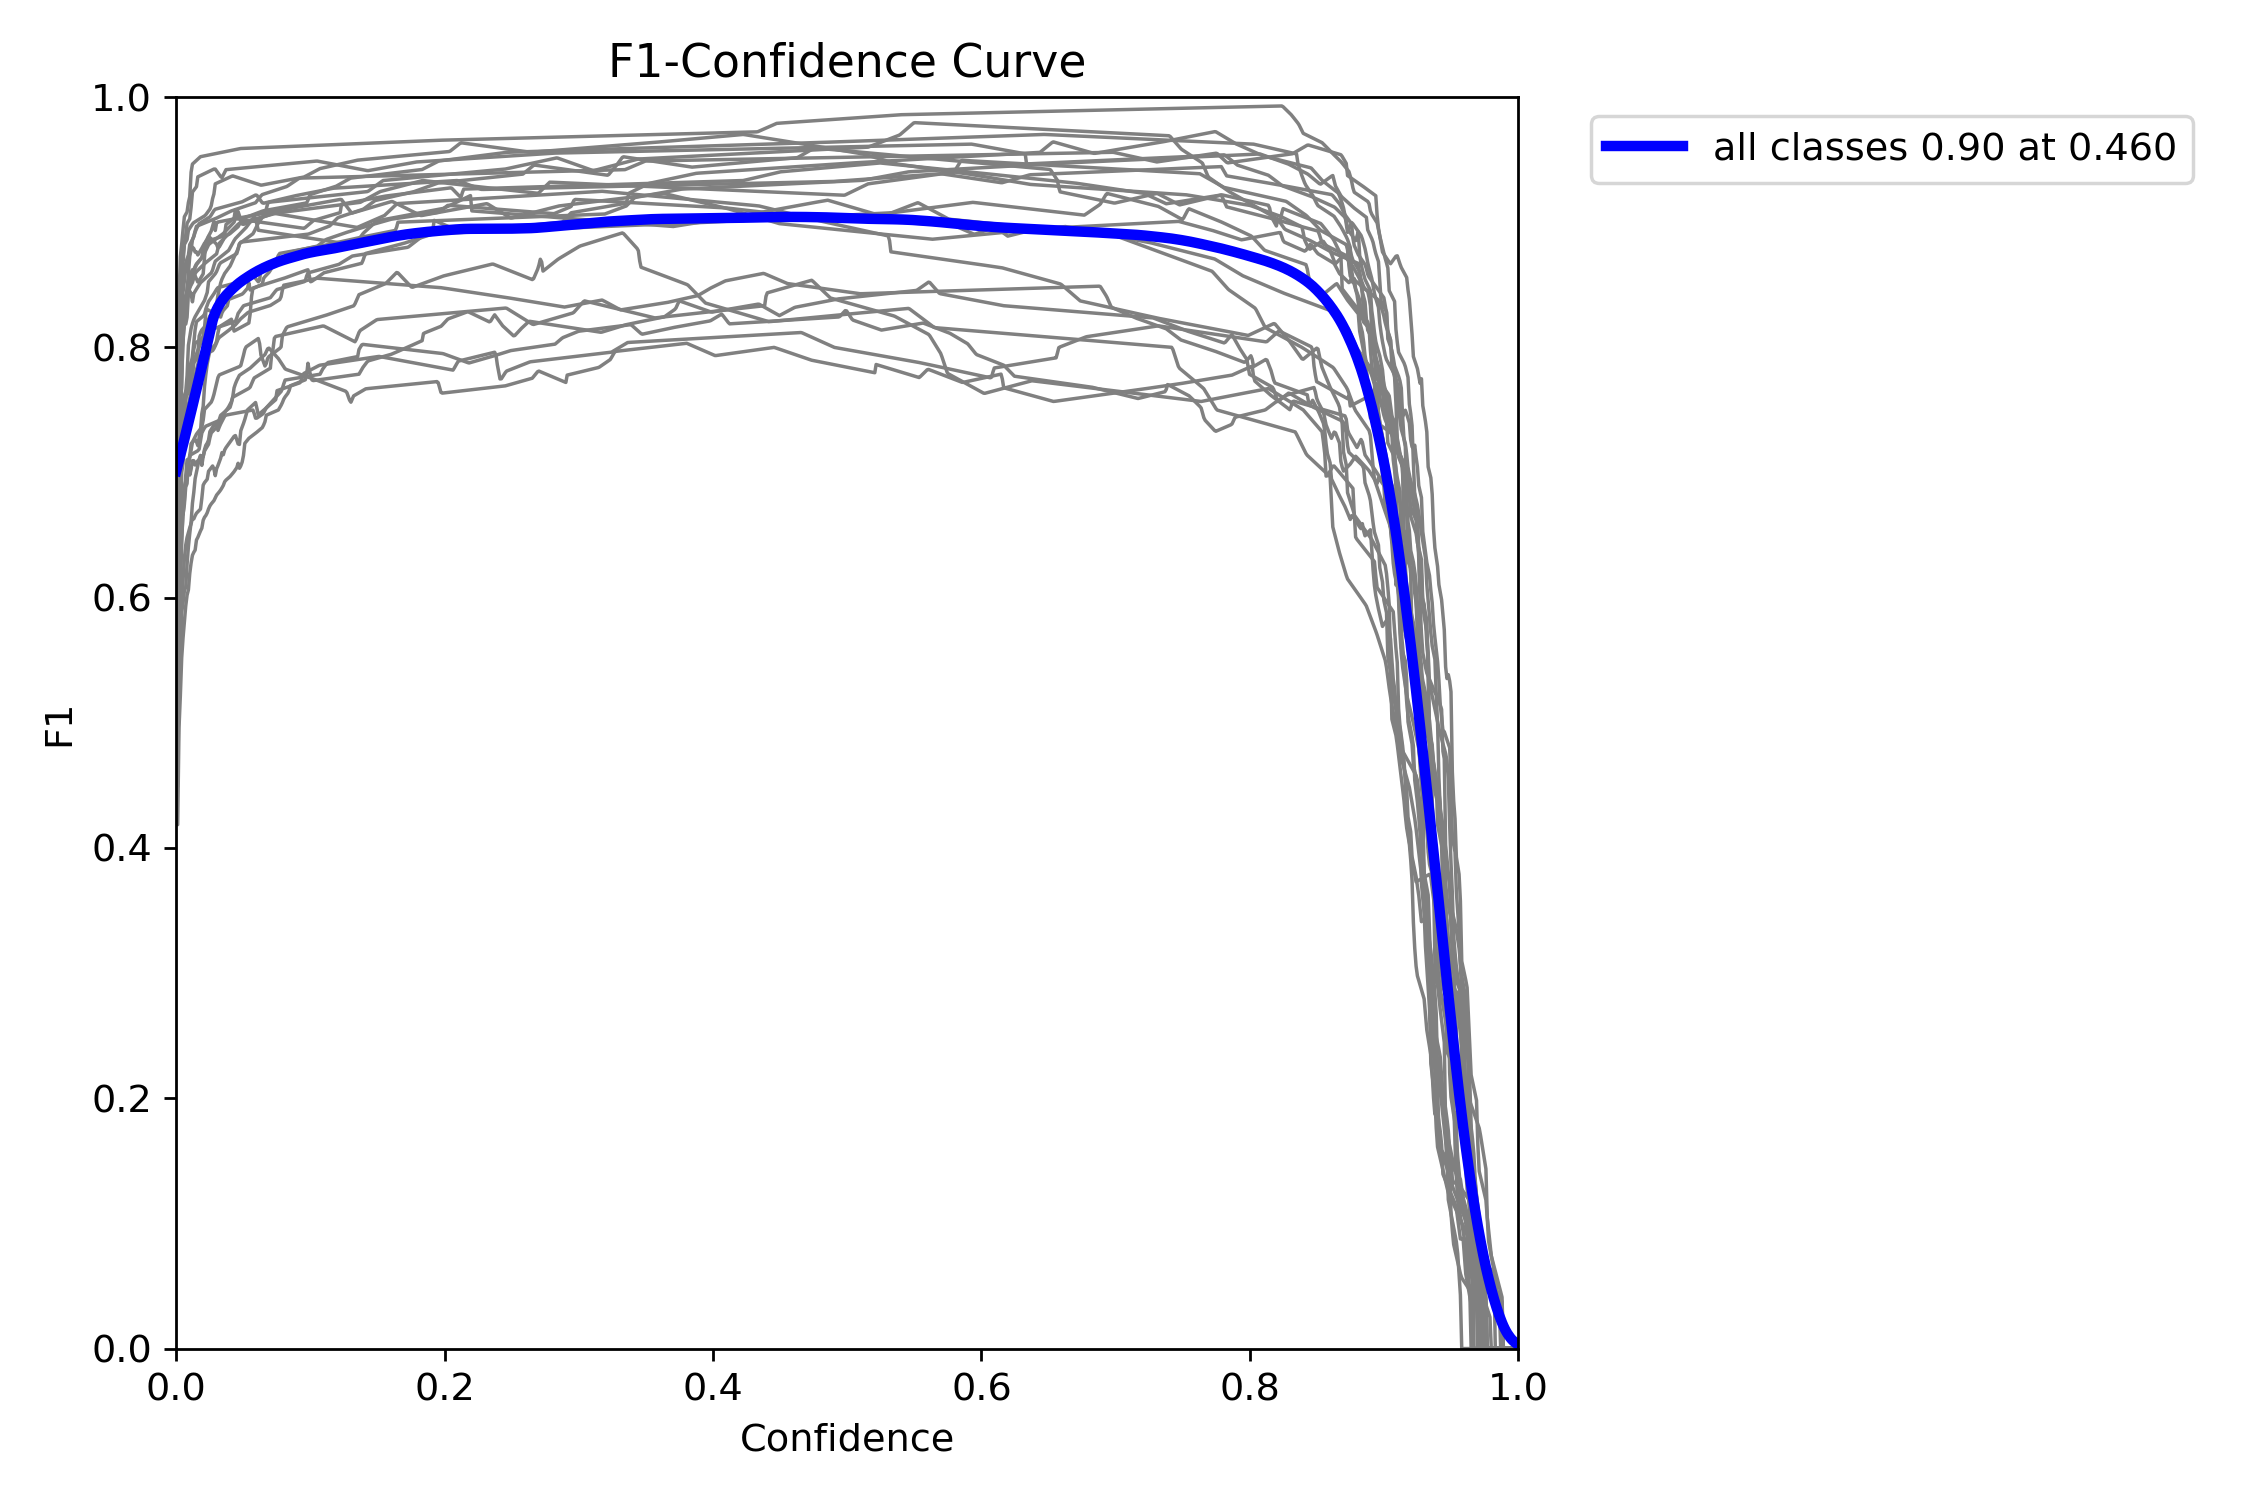

In [ ]:
# Графік залежності F1-score від рівня впевненості (F1-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/F1_curve.png', width =600)

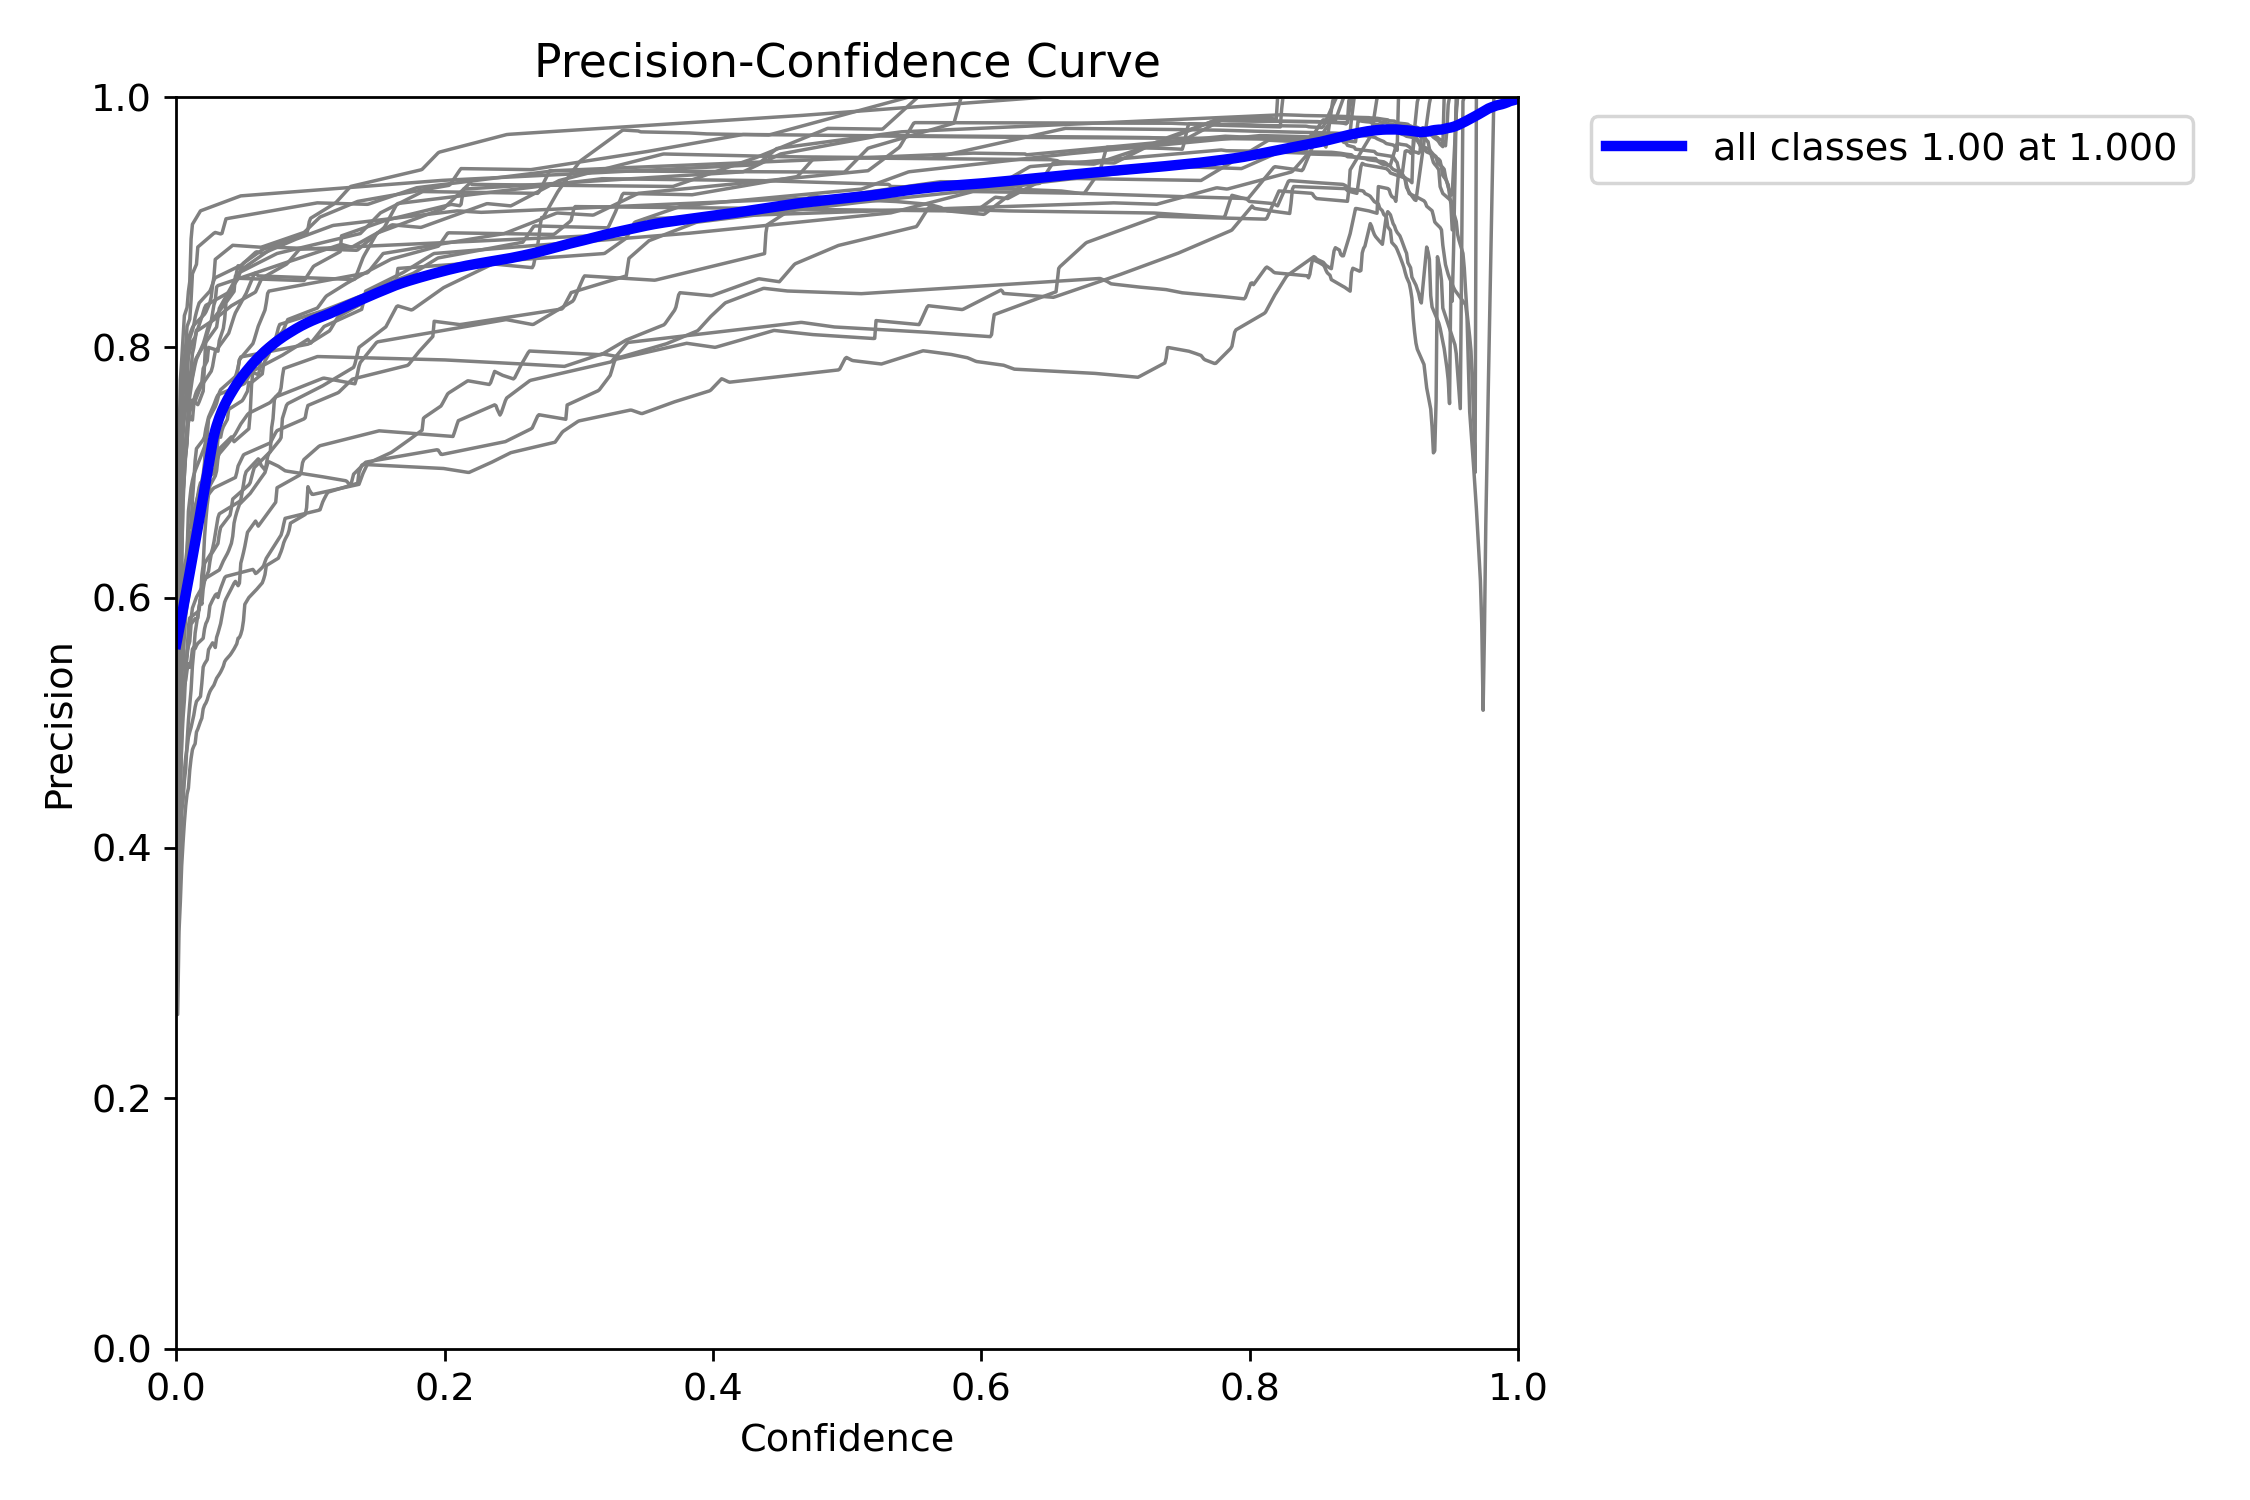

In [ ]:
# Графік залежності точності від впевненості *(Orecision-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/P_curve.png', width =600)

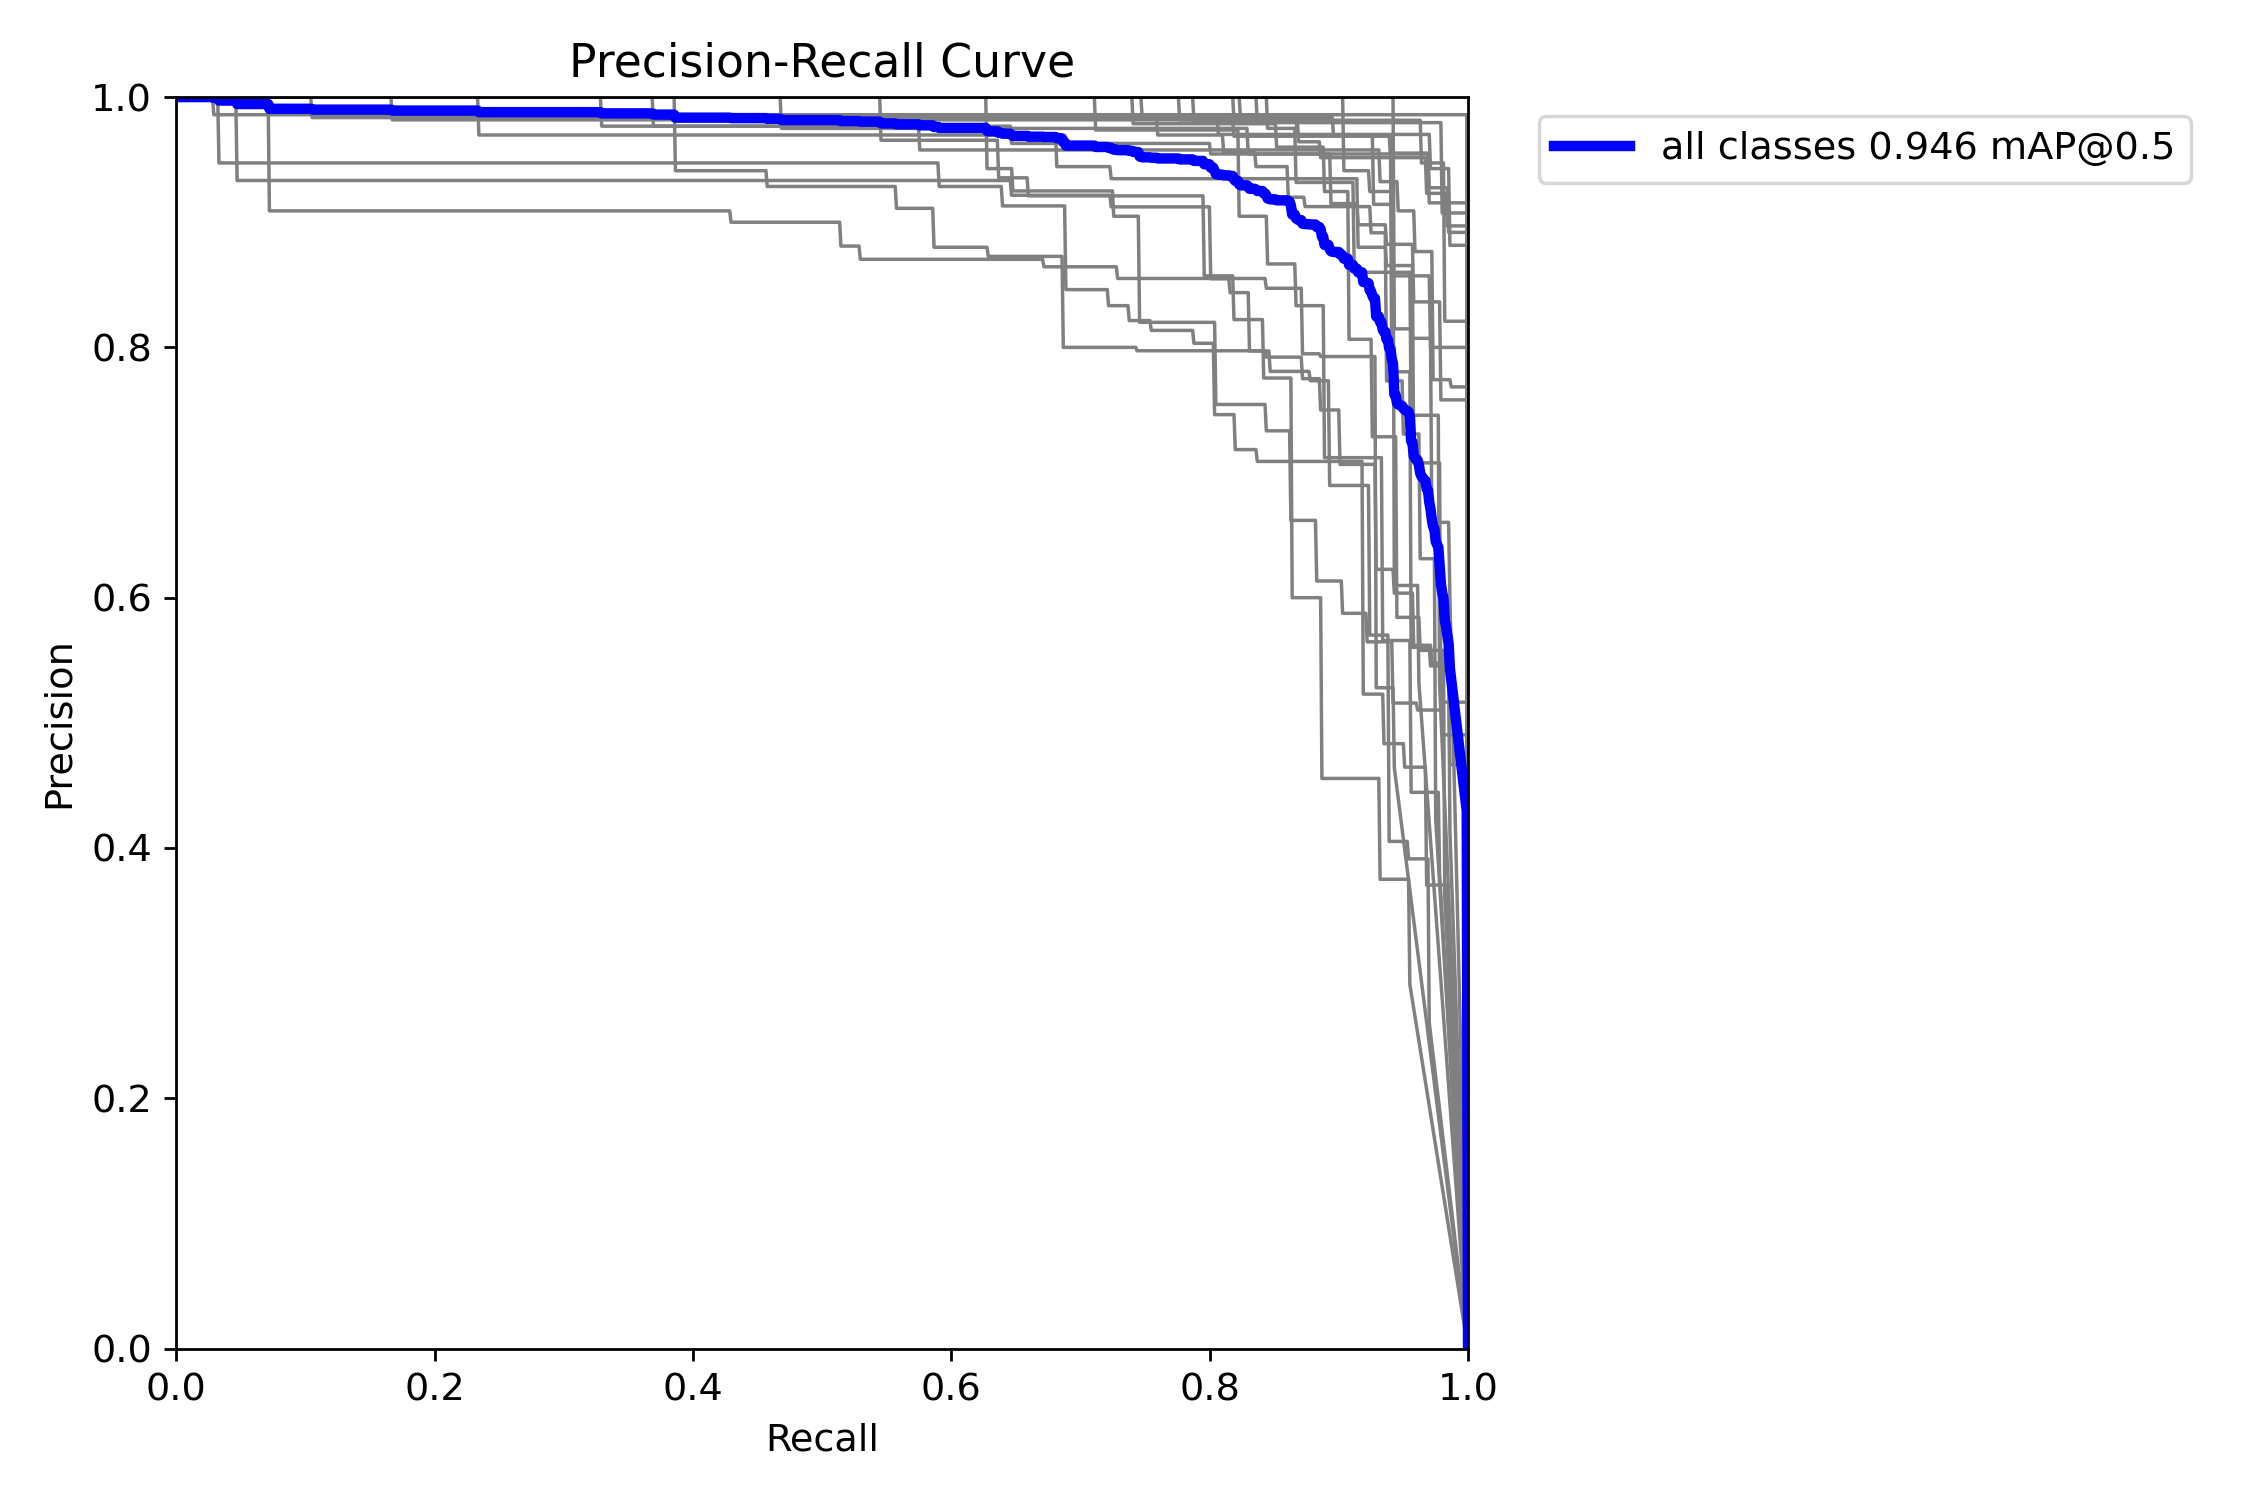

In [ ]:
# Графік залежності точності від повноти (Precision-Recall Curve)
IPyImage (filename = f'/content/runs/detect/train_result/PR_curve.png', width =600)

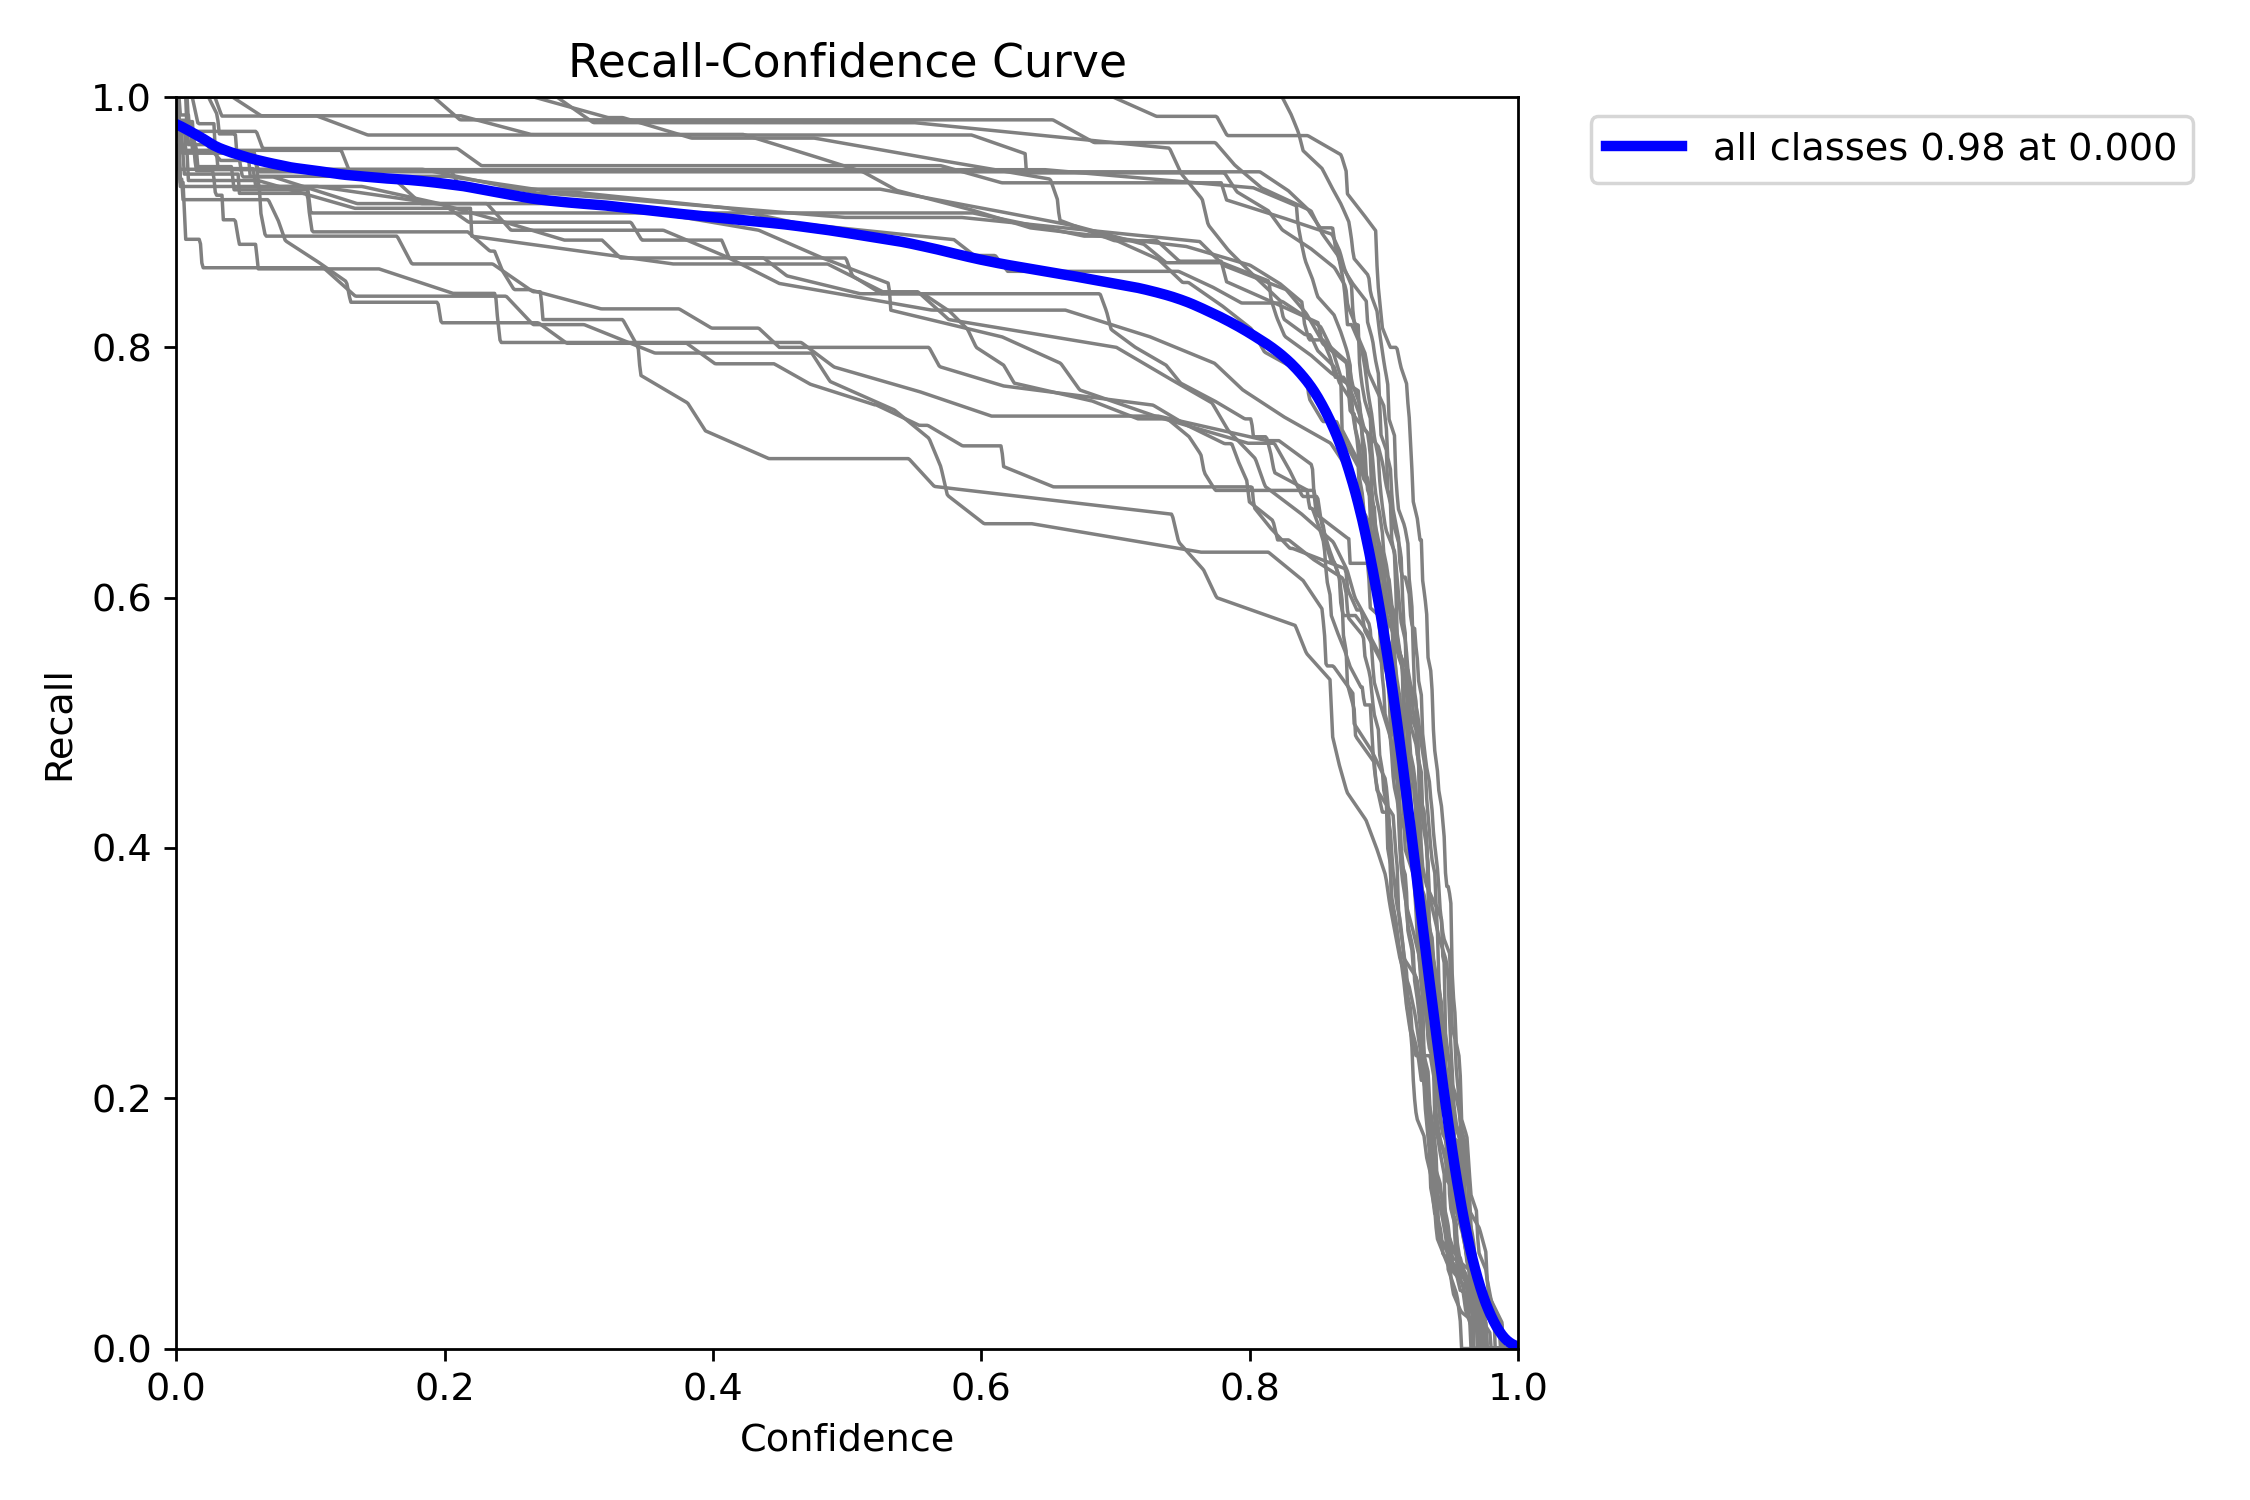

In [ ]:
# Графік залежності повноти від впевненості (Recall-Confidence Curve)
IPyImage (filename = f'/content/runs/detect/train_result/R_curve.png', width =600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Вкажи шлях до вихідної папки
source_folder = "/content/runs"

# Вкажи шлях до папки на Google Drive
destination_folder = "/content/drive/MyDrive/ITVR_Coursework/yolo11m (100 epochs, 16 im batch)"

# Копіюємо папку, дозволяючи перезаписувати існуючі файли
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

print("Папку успішно скопійовано!")

Папку успішно скопійовано!


In [ ]:
import shutil
from google.colab import files

# Вкажи шлях до папки, яку потрібно завантажити
folder_path = "/content/runs"

# Стиснемо папку у формат ZIP
shutil.make_archive("yolo11m (100 epochs, 16 im batch)", "zip", folder_path)

# Завантажимо архів
files.download("yolo11m (100 epochs, 16 im batch).zip")